Decision Tree Accuracy: 0.8
Random Forest Accuracy: 0.9853658536585366


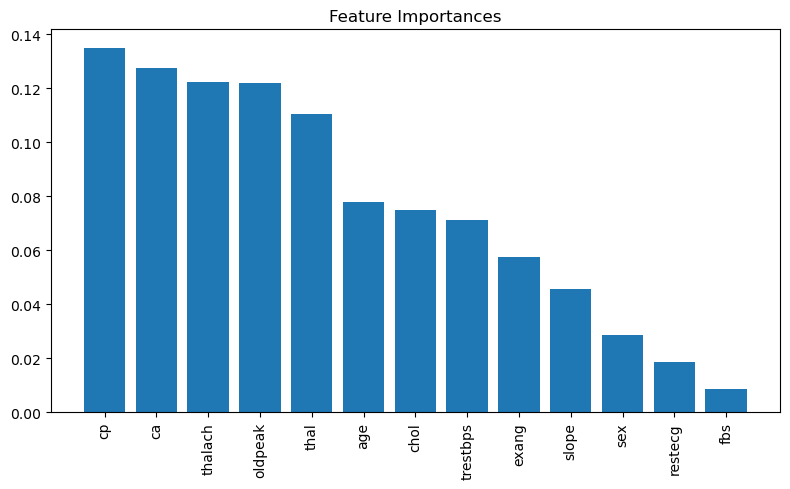

Decision Tree CV Accuracy: 0.8341463414634147
Random Forest CV Accuracy: 0.9970731707317073


In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#Load Dataset

df = pd.read_csv("heart[1].csv")
df.head()

#Features and Target
X = df.drop("target", axis=1)
y = df["target"]

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

#Feature Importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

# Cross-Validation
cv_scores_dt = cross_val_score(dt, X, y, cv=5)
cv_scores_rf = cross_val_score(rf, X, y, cv=5)

print("Decision Tree CV Accuracy:", np.mean(cv_scores_dt))
print("Random Forest CV Accuracy:", np.mean(cv_scores_rf))
